# Statistical Learning Final Project
using Dataset from: https://www.kaggle.com/c/m5-forecasting-accuracy <br><br>
**File 1: “calendar.csv”** <br>
Contains information about <u>**the dates the products are sold**</u>. <br>
&emsp; •	date: The date in a “y-m-d” format. <br>
&emsp; •	wm_yr_wk: The id of the week the date belongs to. <br>
&emsp; •	weekday: The type of the day (Saturday, Sunday, …, Friday). <br>
&emsp; •	wday: The id of the weekday, starting from Saturday. <br>
&emsp; •	month: The month of the date. <br>
&emsp; •	year: The year of the date. <br>
&emsp; •	event_name_1: If the date includes an event, the name of this event. <br>
&emsp; •	event_type_1: If the date includes an event, the type of this event. <br>
&emsp; •	event_name_2: If the date includes a second event, the name of this event. <br>
&emsp; •	event_type_2: If the date includes a second event, the type of this event. <br>
&emsp; •	snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP  purchases on the examined date. 1 indicates that SNAP purchases are allowed. <br>
<br>
Note: In the United States, the Supplemental Nutrition Assistance Program (SNAP), formerly yet still commonly known as the Food Stamp Program, is a federal program that provides food-purchasing assistance for low- and no-income people.<br>
<br>
**File 2: “sell_prices.csv”** <br>
Contains information about <u>**the price of the products sold per store and date**</u>. <br>
&emsp; •	store_id: The id of the store where the product is sold.  <br>
&emsp; •	item_id: The id of the product. <br>
&emsp; •	wm_yr_wk: The id of the week. <br>
&emsp; •	sell_price: The price of the product for the given week/store. The price is provided per week (average across seven days). If not available, this means that the product was not sold during the examined week. Note that although prices are constant at weekly basis, they may change through time (both training and test set). <br>
<br>
**File 3: “sales_train_validation.csv”** <br>
Contains the <u>**historical daily unit sales data per product and store**</u>. <br>
&emsp; •	item_id: The id of the product. <br>
&emsp; •	dept_id: The id of the department the product belongs to. <br>
&emsp; •	cat_id: The id of the category the product belongs to. <br>
&emsp; •	store_id: The id of the store where the product is sold. <br>
&emsp; •	state_id: The State where the store is located. <br>
&emsp; •	d_1, d_2, …, d_i, … d_1941: The number of units sold at day i, starting from 2011-01-29.  <br>

**Overview of how the M5 series are organized):**<br>
<img src="overview.png">

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 讓 DataFrame Output可以重複疊起來

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
pd.set_option('display.max_row', 50)

In [3]:
calendar = pd.read_csv('calendar.csv')
history = pd.read_csv('sales_train_validation.csv')
price = pd.read_csv('sell_prices.csv')
print(calendar.shape)
print(history.shape)
print(price.shape)

(1969, 14)
(30490, 1919)
(6841121, 4)


In [4]:
calendar.head()
history.head()
price.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


The historical data range from **2011-01-29 to 2016-06-19**. Thus, the products have a (maximum) selling history of 1,941  days / 5.4 years (test data of h=28 days not included).

In [5]:
calendar.isna().sum() # event_name_1, event_type_1, event_name_2, event_type_2 have missing values
price.isna().sum() # No missing values
history.isna().sum().sum() # No missing values

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

0

# Data Preprocessing

### calendar

In [6]:
calendar = calendar[['d', 'date', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2', 'snap_CA']]
calendar['date'] = pd.to_datetime(calendar['date'])

In [7]:
calendar.dtypes

d                       object
date            datetime64[ns]
event_name_1            object
event_name_2            object
event_type_1            object
event_type_2            object
snap_CA                  int64
dtype: object

In [8]:
calendar.set_index('d', inplace=True)

In [9]:
calendar.head()

,date,event_name_1,event_name_2,event_type_1,event_type_2,snap_CA
d,,,,,,
d_1,2011-01-29,NaN,NaN,NaN,NaN,0
d_2,2011-01-30,NaN,NaN,NaN,NaN,0
d_3,2011-01-31,NaN,NaN,NaN,NaN,0
d_4,2011-02-01,NaN,NaN,NaN,NaN,1
d_5,2011-02-02,NaN,NaN,NaN,NaN,1


### price

In [10]:
price['id'] = price['item_id'] + '_' + price['store_id'] + '_validation'
price.set_index('id', inplace=True)

In [11]:
price.head()

,store_id,item_id,wm_yr_wk,sell_price
id,,,,
HOBBIES_1_001_CA_1_validation,CA_1,HOBBIES_1_001,11325,9.58
HOBBIES_1_001_CA_1_validation,CA_1,HOBBIES_1_001,11326,9.58
HOBBIES_1_001_CA_1_validation,CA_1,HOBBIES_1_001,11327,8.26
HOBBIES_1_001_CA_1_validation,CA_1,HOBBIES_1_001,11328,8.26
HOBBIES_1_001_CA_1_validation,CA_1,HOBBIES_1_001,11329,8.26


### history

In [12]:
history.set_index('id', inplace=True)

In [13]:
history.head()

,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


## Steps:
#### Exploratory Data Analysis
* trends
* seasonality

#### Feature Engineering
* Extract features using a host of denoising methods

#### Statistical Methodologies
* Exponential Smoothing Methods: eg. Holts-winter, Theta
* Autoregressive Integrated Moving Average (ARIMA)

#### Machine learning
* Quantile Regression Forest (QRF)
* Support Vector Regression (SVR)
* Recurrent Neural Networks (RNNs) and Long-Short-Term Memory (LSTM)
* LightBGM

#### Evaluation:
* __Weighted RMSSE__ (Root Mean Squared Scaled Error)
* __Weighted SPL__ (Scaled Pinball Loss function)
* __Weight: cumulative actual dollar sales__, using __the last 28 observations__ of the training sample (sum of units sold multiplied by their respective price), i.e., a period equal to the forecasting horizon.

# EDA

d_1       0
d_2       0
d_3       0
d_4       0
d_5       0
         ..
d_1909    1
d_1910    0
d_1911    1
d_1912    1
d_1913    1
Name: HOBBIES_1_003_CA_1_validation, Length: 1913, dtype: object


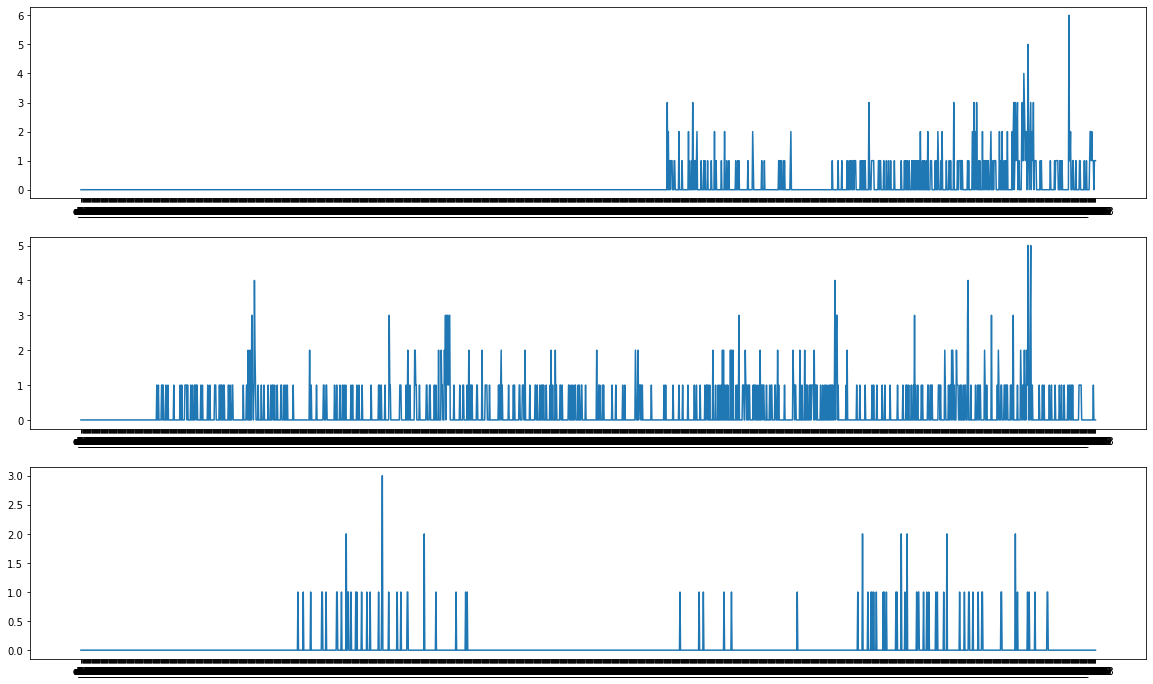

In [45]:
ids = history.index
d_cols = sorted([c for c in history.columns if 'd_' in c])

sales_1 = history.loc[ids[2], d_cols]
sales_2 = history.loc[ids[1], d_cols]
sales_3 = history.loc[ids[17], d_cols]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 12))

axes[0].plot(d_cols, sales_1)
axes[1].plot(d_cols, sales_2)
axes[2].plot(d_cols, sales_3)

plt.tight_layout()

It is not hard to tell that the trend of sales for each goods can vary extremely differently.<br>
The first graph shows that the sales remain zero for a fairly long time, and then start to sell.<br>
The second graph shows that an ordinary trend of sales, which had been sold relatively evenly throughout the days.<br>
The third graph seems to exhibit seasonal trends.

# Feature Engineering
## Denoising
* Wavelet Transform(with thresholding techniques)
* Fuzzy logic
* FIR filtering
* Empirical Mode Decomposition
* singular spectrum analysis
* Huang-Hilbert transform
* Gaussian filtering
* Kalman Filter (KF), the Interacting Multiple Model (IMM) technique
* detrended fluctuation analysis
* hodrick prescott filter transformation by decomposition
* Holt linear
* Exponential Smoothing

# Wavelet Denoising